# Pertemuan 7 Data Science 8
## Sumber : https://youtu.be/nWJUJenAyB8
## Multiple Linear Regression & Polynomial Regression

## Sample Dataset

### Training Dataset

In [3]:
import pandas as pd
pizza = {'diameter':[6,8,10,14,18],
        'n_topping' : [2,1,0,2,0],
        'harga': [7,9,13,17.5,18]}

train_pizza_df = pd.DataFrame(pizza)
train_pizza_df

,diameter,n_topping,harga
0,6,2,7.0
1,8,1,9.0
2,10,0,13.0
3,14,2,17.5
4,18,0,18.0


### Testing Dataset

In [5]:
pizza = {'diameter':[8,9,11,16,12],
        'n_topping':[2,0,2,2,0],
         'harga':[11,8.5,15,18,11]}
test_pizza_df = pd.DataFrame(pizza)
test_pizza_df

,diameter,n_topping,harga
0,8,2,11.0
1,9,0,8.5
2,11,2,15.0
3,16,2,18.0
4,12,0,11.0


## Preprocessing Dataset

In [7]:
import numpy as np
X_train = np.array(train_pizza_df[['diameter','n_topping']])
y_train = np.array(train_pizza_df['harga'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[ 6  2]
 [ 8  1]
 [10  0]
 [14  2]
 [18  0]]

y_train: [ 7.   9.  13.  17.5 18. ]


In [9]:
X_test = np.array(test_pizza_df[['diameter','n_topping']])
y_test = np.array(test_pizza_df['harga'])

print(f'X_test:\n{X_test}\n')
print(f'y_test: {y_test}')

X_test:
[[ 8  2]
 [ 9  0]
 [11  2]
 [16  2]
 [12  0]]

y_test: [11.   8.5 15.  18.  11. ]


memisahkan kolom feature dan kolom target, untuk train dan test 
- kolom feature yaitu diamter dan n_topping dibentuk dalam duadimensi.
- kolom target yaitu harga.

## Multiple Linear Regression

Multiple Linear Regression merupakan generalisasi dari simple linear regression yang memungkinkan untuk menggunakan beberapa explanatory variables. perbedaan dari simple linear regression dengan multiple linear regression terletak dari jumlah features atau explanatory varible, pada simple hanya menggunakan satu feature, dan multiple menggunakan lebih dari satu feature.

## $y = \alpha + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n $

dalam bentuk ini bentuk $x$ ini (feature) bisa lebih satu, untuk nilai $x$ nya akan di kalikan dengan $\beta$ .

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'r_squared: {r2_score(y_test, y_pred)}')

r_squared: 0.7701677731318468


implementasi multiple linear regression
- mengimport Linear Regression
- mengimport r2_score
- membuat object model.
- melakukan training model menggunakan `fit` dan menyertakan `X_train` dan `y_train`
- melakukan prediksi dengan `model.predict` dari `X_test`

dalam bentuk kodingannya tidak ada yang berbeda dari simple linear regression hanya menambahkan nilai featurenya saja

## Poynomina Regression

Polynomial regression memodelkan hubungan antara independent variable $x$ dan dependent variable $y$ sebagai derajat polynomial dalam $x$. 

independent variable adalah nilai feature

dependent varible adalah nilai target.

### Preprocessing Dataset

In [12]:
X_train = np.array(train_pizza_df['diameter']).reshape(-1,1)
y_train = np.array(train_pizza_df['harga'])

print(f'x_train:\n{X_train}\n')
print(f'y_train: {y_train}')

x_train:
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

y_train: [ 7.   9.  13.  17.5 18. ]


`reshape(-1,1)` digunakan untuk melakukan pemangkasan supaya dapat menampilkan satu baris feature saja dari multi dimensi. nampa menghilangkan multi dimensi.

## Polynomial Regression : Quadratic

### $y = \alpha + \beta_1 x + \beta_2 x^2$

nilai x yaitu featurenya hanya satu, akan di representasikan sebagai polynomial.

### Polynomial Features

In [17]:
from sklearn.preprocessing import PolynomialFeatures

quadratic_feature = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_feature.fit_transform(X_train)

print(f'X_train_quadratic:\n{X_train_quadratic}\n')

X_train_quadratic:
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]



melakukan transformasi polynomial feature
- melakukan import `PolynomialFeature`
- membentuk objek `Polymonialfeature` dan mementukan kuadratnya `(degree = val)`
- lalu melakukan transformasi dari X_train.

nilai 1 didapatkan dari nilai index kesatu di pangkatkan 0, lalu  dipangkatkan 1, lalu dipangkatkan 2.

### Training Model

In [18]:
model = LinearRegression()
model.fit(X_train_quadratic, y_train)

LinearRegression()

proses training model :
- membuat object model
- mentraining nilai traning modelnya dengan `fit` proses traningnya menggunakan nilai feature yang sudah di transformasi Polymonial.

### Visualisasi Model

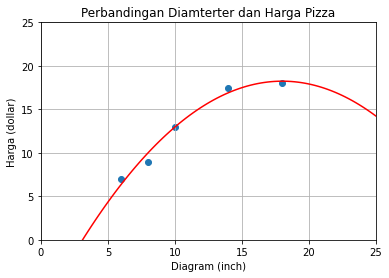

In [21]:
import matplotlib.pyplot as plt

X_vis = np.linspace(0,25,100).reshape(-1,1)
X_vis_quadratic = quadratic_feature.transform(X_vis)
y_vis_quadratic = model.predict(X_vis_quadratic)

plt.scatter(X_train, y_train)
plt.plot(X_vis, y_vis_quadratic, '-r')

plt.title('Perbandingan Diamterter dan Harga Pizza')
plt.xlabel('Diagram (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show()

proses visualisasi :
- melakukan import plt.
- membentuk deret bilangan dari 0 sampai 25 sebanyak 100 data poin `(linspace)` lalu di transformasi menggunakan `reshape (-1,1)`
- lalu melakukan transformasi dengan `quadratic_feature`.
- lalu melakukan prediksi mengugnakan `model.predict`
- data poin yang divisualisasi scatter yaitu `X_train` dan `y_train`. kelima dataset ini adalah hasil dari training.
- hasil prediksinya akan divisualisasi sebagai line plot

## Polynominal Regression : Quadratic vs Cubic

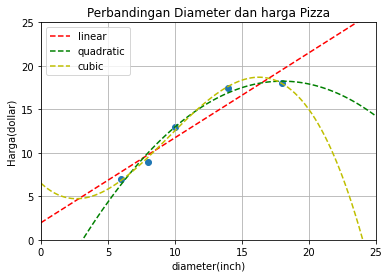

In [28]:
# training Set
plt.scatter(X_train, y_train)

#Linear
model = LinearRegression()
model.fit(X_train, y_train)
X_vis = np.linspace(0,25,100).reshape(-1,1)
y_vis = model.predict(X_vis)
plt.plot(X_vis, y_vis,'--r', label = 'linear')

#Quadratic
quadratic_feature = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_feature.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_quadratic, y_train)
X_vis_qadratic = quadratic_feature.transform(X_vis)
y_vis = model.predict(X_vis_quadratic)
plt.plot(X_vis, y_vis, '--g', label = 'quadratic')

#cubic
cubic_feature = PolynomialFeatures(degree = 3)
X_train_cubic = cubic_feature.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_cubic, y_train)
X_vis_cubic = cubic_feature.transform(X_vis)
y_vis = model.predict(X_vis_cubic)
plt.plot(X_vis, y_vis, '--y', label = 'cubic')

plt.title('Perbandingan Diameter dan harga Pizza')
plt.xlabel('diameter(inch)')
plt.ylabel('Harga(dollar)')
plt.legend()
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show()

membuat perbandingan :
- membuat scatter plot dulu yang isinya `X_train` dan `y_train`
- untuk membuat linear :
> - membuat dulu model `LinearRegression`
> - lalu model di training menggunakan X_train dan y_train
> - membentuk deret bilangan dari 0 sampai 25 sebanyak 100 data poin `(linspace)` lalu di transformasi menggunakan `reshape (-1,1)`
> - lalu melakukan prediksi dari deret bilangan.
> - lalu melakukan plotingan untuk visualisasi datanya menggunakan lineplot warna merah. (--r)
- membuat quadratic :
> - membuat object `PolynomialFeature` dengan `(degree=2)`
> - lalu membuat transformasi X_train menggunakan PolynomialFeature
> - melakukan model `LinearRegression()`
> - lalu melakukan traning dengan menggunakan `feature` yang sudah di di transformasi menggunakan `PolynomialFeature`.
> - melakukan transformasi dari deret bilangan dari 0 sampai 25.
> - melakukan prediksi dari transformasi deret bilangan tersebut.
> - membuat plotingan line plot, dengan menggunakan warna hijau
- membuat cubic : 
> - membuat object `PolynomialFeature` dengan `(degree=3)`
> - lalu membuat transformasi X_train menggunakan PolynomialFeature
> - melakukan model `LinearRegression()`
> - lalu melakukan traning dengan menggunakan `feature` yang sudah di di transformasi menggunakan `PolynomialFeature`.
> - melakukan transformasi dari deret bilangan dari 0 sampai 25.
> - melakukan prediksi dari transformasi deret bilangan tersebut.
> - membuat plotingan line plot, dengan menggunakan warna kuning